In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [21]:
data = pd.read_csv('wine.csv', header = None)

In [22]:
X = data.drop([0], axis=1)
Y = data[0]

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

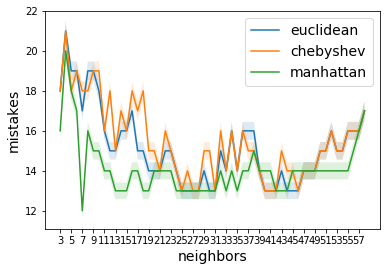

In [37]:
max_neighbors = int(len(X_train)/2)
metricas = ["euclidean", "chebyshev", "manhattan"]

mistakes = [[],[],[]]
deviations = [[],[],[]]

for i in range(3):
    
    for neighbors in range(3, max_neigbors):
        classifier = KNeighborsClassifier(n_neighbors=neighbors, metric=metricas[i])
        classifier.fit(X_train, Y_train)
        prediction = classifier.predict(X_test)
        mistakes[i].append((prediction != Y_test).sum())
        deviations[i].append((prediction != Y_test).std())
    
    plt.plot(range(3, max_neighbors), mistakes[i], label=metricas[i])
    plt.fill_between(range(3, max_neighbors), np.array(mistakes[i]) - np.array(deviations[i]), np.array(mistakes[i]) + np.array(deviations[i]), alpha=0.15)


plt.xticks(range(3, max_neighbors, 2))
plt.xlabel('neighbors', fontsize=14)
plt.ylabel('mistakes', fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.show()


###### Вывод: минимум достигается метрикой суммы модулей при 7 соседях